In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:, 5] #只使用房间数量这个特征

In [6]:
x.shape

(506,)

In [7]:
y = boston.target
y.shape

(506,)

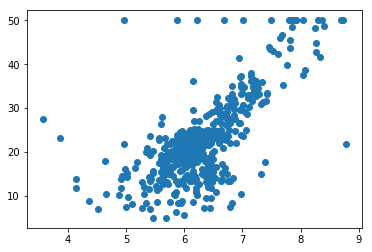

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
np.max(y) 

50.0

### 最大值是50，大于50的数据也被记为50。
### 出现这种情况的原因，可能是问卷调查最大的选项是50及50以上
### 做模型的时候，将这种数据清除出去

In [10]:
x = x[y < 50.0]
y = y[y < 50.0]

In [11]:
x.shape

(490,)

In [12]:
y.shape

(490,)

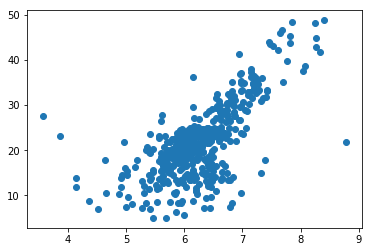

In [13]:
plt.scatter(x,y)
plt.show()

In [14]:
from playML.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [15]:
x_train.shape

(392,)

In [16]:
y_train.shape

(392,)

In [17]:
x_test.shape

(98,)

In [18]:
y_test.shape

(98,)

In [34]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [38]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)

## R Squared

In [ ]:
from playML.metrics import mean_squared_error

1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

In [39]:
from playML.metrics import r_squared

r_squared(y_test, y_predict)

0.6129316803937322

## scikit-learn中的r_squared

In [40]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

#### scikit-learn中的LinearRegression中的score返回r2_score:http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## 在我们的SimpleRegression中添加score

In [44]:
reg.score(x_test, y_test)

0.6129316803937322